In [230]:
import numpy as np
import cvxopt
import matplotlib.pyplot as plt

In [231]:
file = open("Train.txt")

lines = file.readlines()

numClass, numFeatures, datasetLen = 0,0,0

count = 0
dataset = []

for line in lines:
    if count == 0:
        var = line.split()
        numClass = int(var[0])
        numFeatures = int(var[1])
        datasetLen = int(var[2])
    else:
        var = line.split()
        var = [float(x) for x in var]
        dataset.append(var)
    
    count += 1

In [232]:
X = []
y = []

for i in range(datasetLen):
    X.append(dataset[i][:numFeatures])
    if dataset[i][numFeatures] == 1:
        y.append(+1.0)
    else:
        y.append(-1.0)
        
X = np.array(X)
y = np.array(y)

In [233]:
class SVM:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # P = X^T X
        K = np.zeros((n_samples, n_samples))
    
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = np.dot(y[i]*X[i], y[j]*X[j])
        
        # finding lagrange multiplier using convex optimization lirary
        
        # P = X^T X where X = y.x
        P = cvxopt.matrix(K)
        # q = -1 (1xN)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        # A = y^T 
        A = cvxopt.matrix(y, (1, n_samples))
        # b = 0 
        b = cvxopt.matrix(0.0)
        # -1 (NxN)
        G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
        # 0 (1xN) 
        h = cvxopt.matrix(np.zeros(n_samples))
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        # Lagrange have non zero lagrange multipliers
        sv = a > 0
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]

        # Weights
        self.w = np.zeros(n_features)
        for n in range(len(self.a)):
            self.w += self.a[n] * self.sv_y[n] * self.sv[n]

        # intercept        
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n] - np.dot(self.w,self.sv[n])
        self.b /= len(self.a)
        return self.w,self.b

In [234]:
svm = SVM()
w,b = svm.fit(X,y)
print(w)
w = np.append(w,b)

     pcost       dcost       gap    pres   dres
 0: -1.2264e+00 -1.6344e+00  2e+02  1e+01  1e+00
 1: -1.3488e-01 -1.5735e-01  5e+00  4e-01  4e-02
 2:  6.1021e-03 -1.4153e-01  1e-01  3e-16  4e-15
 3: -3.3408e-02 -5.0691e-02  2e-02  2e-17  1e-15
 4: -4.1286e-02 -5.3250e-02  1e-02  5e-17  1e-15
 5: -4.7895e-02 -4.9054e-02  1e-03  3e-17  1e-15
 6: -4.8877e-02 -4.8896e-02  2e-05  1e-17  1e-15
 7: -4.8893e-02 -4.8893e-02  2e-07  2e-17  1e-15
 8: -4.8893e-02 -4.8893e-02  2e-09  1e-17  1e-15
Optimal solution found.
[-0.1885721  -0.24945416]


In [235]:
file = open("Test.txt")

lines = file.readlines()


count = 0
test_dataset = []
accuracy = 0

for line in lines:
    var = line.split()
    var = [float(x) for x in var]
    test_dataset.append(var)
    
    count += 1

predictions = []    

for i in test_dataset:
    x = np.array(i) 
    group = x[numFeatures]
    x[numFeatures] = 1
    product = round(np.dot(w,x))
    predictions.append(product)
    if product>=1:
        pred = 1 
        if(pred==group):
            accuracy += 1
    else:
        pred = 2 
        if(pred==group):
            accuracy += 1
print((accuracy/len(test_dataset))*100)

96.0


In [236]:
test_dataset = np.array(test_dataset)
test_dataset = test_dataset.transpose()

def f(x, w, b, c=0):
    return (-w[0] * x - b + c) / w[1]

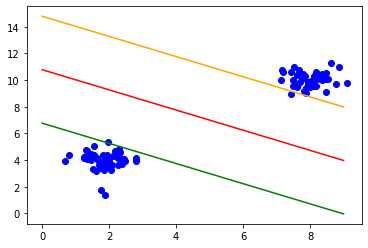

In [238]:
plt.plot(test_dataset[0],test_dataset[1],'bo')
plt.plot(np.arange(0,10),f(np.arange(0,10), w, b),'red')
plt.plot(np.arange(0,10),f(np.arange(0,10), w, b,c=1),'green')
plt.plot(np.arange(0,10),f(np.arange(0,10), w, b,c=-1),'orange')